In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import prep_plays
import wrangle_plays_data


plays = pd.read_csv('plays.csv')
players = pd.read_csv('players.csv')
week1 = pd.read_csv('week1.csv')
#plays = pd.read_csv('plays.csv')


plays

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [2]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [3]:
plays = plays[plays.playType == 'play_type_pass']
plays['passResult'].replace({'C': 0,'I' : 1, 'IN' : 1}, inplace=True)

In [4]:
offenser = plays.groupby('possessionTeam')['offensePlayResult'].sum().reset_index()
offenser

,possessionTeam,offensePlayResult
0,ARI,2862
1,ATL,4891
2,BAL,3677
3,BUF,3091
4,CAR,4026
5,CHI,3625
6,CIN,3575
7,CLE,4286
8,DAL,3892
9,DEN,3585


In [9]:
df['offensepass_rating'] = offenser.offensePlayResult / offenser.offensePlayResult.sum() * 10
offenser

,possessionTeam,offensePlayResult,offensepass_rating
0,ARI,2862,0.223400
1,ATL,4891,0.381778
2,BAL,3677,0.287017
3,BUF,3091,0.241275
4,CAR,4026,0.314259
5,CHI,3625,0.282958
6,CIN,3575,0.279055
7,CLE,4286,0.334554
8,DAL,3892,0.303799
9,DEN,3585,0.279835


In [6]:
pd.set_option('display.max_columns',None)
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,0,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,1,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,1,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,0,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,1,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18601,2018122201,3842,(2:19) (Shotgun) P.Rivers pass short right to ...,4,2,2,LAC,play_type_pass,LAC,33,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"1 DL, 5 LB, 5 DB",TRADITIONAL,22.0,10.0,02:19:00,77.0,NaN,NaN,0,7,7,0.460543,False
18602,2018122201,3884,(2:00) (Shotgun) P.Rivers pass short left to K...,4,1,10,LAC,play_type_pass,LAC,40,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,5.0,"1 DL, 4 LB, 6 DB",TRADITIONAL,22.0,10.0,02:00:00,70.0,NaN,NaN,0,17,17,0.712741,False
18603,2018122201,3909,(1:41) (Shotgun) P.Rivers pass incomplete shor...,4,1,10,LAC,play_type_pass,BAL,43,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,5.0,"1 DL, 4 LB, 6 DB",TRADITIONAL,22.0,10.0,01:41:00,53.0,NaN,NaN,1,0,0,-0.229687,False
18604,2018122201,3931,(1:37) (Shotgun) P.Rivers pass incomplete deep...,4,2,10,LAC,play_type_pass,BAL,43,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,4.0,"1 DL, 4 LB, 6 DB",TRADITIONAL,22.0,10.0,01:37:00,53.0,NaN,NaN,1,0,0,-0.460746,False


In [ ]:
plays[plays['playId'] == 75]

In [ ]:
test = plays.groupby(['gameId','playId'])

In [ ]:
test

In [ ]:
plays.typeDropback.value_counts()

In [ ]:
plays10 = plays.head(10)

In [2]:
df = prep_plays.prep_plays_data()

In [3]:
pd.set_option('display.max_columns',None)
df

,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,(2:19) (Shotgun) P.Rivers pass short right to ...,4,2,2,19,6.0,4.0,0.0,02:19:00,77.0,0.460543,0,7,1,1,3,1,5,5,0,0,0,0,1,0,0,0,0,1,0
17003,(2:00) (Shotgun) P.Rivers pass short left to K...,4,1,10,19,4.0,5.0,0.0,02:00:00,70.0,0.712741,0,17,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1
17004,(1:41) (Shotgun) P.Rivers pass incomplete shor...,4,1,10,19,5.0,5.0,0.0,01:41:00,53.0,-0.229687,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1
17005,(1:37) (Shotgun) P.Rivers pass incomplete deep...,4,2,10,19,4.0,4.0,0.0,01:37:00,53.0,-0.460746,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1


In [10]:
df

,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,offensepass_rating
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0,0.223400
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0,0.381778
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0,0.287017
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1,0.241275
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0,0.314259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,(2:19) (Shotgun) P.Rivers pass short right to ...,4,2,2,19,6.0,4.0,0.0,02:19:00,77.0,0.460543,0,7,1,1,3,1,5,5,0,0,0,0,1,0,0,0,0,1,0,NaN
17003,(2:00) (Shotgun) P.Rivers pass short left to K...,4,1,10,19,4.0,5.0,0.0,02:00:00,70.0,0.712741,0,17,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,NaN
17004,(1:41) (Shotgun) P.Rivers pass incomplete shor...,4,1,10,19,5.0,5.0,0.0,01:41:00,53.0,-0.229687,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,NaN
17005,(1:37) (Shotgun) P.Rivers pass incomplete deep...,4,2,10,19,4.0,4.0,0.0,01:37:00,53.0,-0.460746,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,NaN


In [21]:
ditb = df.groupby('defendersInTheBox')['pass_stopped'].sum().reset_index()
#df['ditb_rating'] = 
ditb

,defendersInTheBox,pass_stopped
0,1.0,2
1,2.0,5
2,3.0,35
3,4.0,335
4,5.0,1114
5,6.0,2728
6,7.0,1370
7,8.0,336
8,9.0,14
9,10.0,5


In [9]:
offenser = plays.groupby('possessionTeam')['offensePlayResult'].sum().reset_index()
offenser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   possessionTeam     32 non-null     object
 1   offensePlayResult  32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [22]:
offenser['offensepass_rating'] = offenser.offensePlayResult / offenser.offensePlayResult.sum() * 10
offenser

,possessionTeam,offensePlayResult,offensepass_rating
0,ARI,2531,0.209504
1,ATL,4618,0.382256
2,BAL,3588,0.296998
3,BUF,2809,0.232516
4,CAR,3796,0.314215
5,CHI,3516,0.291038
6,CIN,3306,0.273655
7,CLE,4057,0.335819
8,DAL,3565,0.295094
9,DEN,3470,0.287230


In [10]:
df.head(40)

,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,offensepass_rating
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0,0.209504
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0,0.382256
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0,0.296998
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1,0.232516
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0,0.314215
5,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,8,7.0,4.0,0.0,10:10:00,14.0,-0.344096,0,4,1,1,3,3,3,5,0,0,0,0,1,0,0,0,0,1,0,0.291038
6,(9:24) (Shotgun) N.Foles pass incomplete short...,1,3,4,8,6.0,4.0,0.0,09:24:00,18.0,-1.192208,1,0,1,2,2,3,3,5,1,0,0,0,0,0,0,0,0,1,0,0.273655
7,(9:08) M.Ryan pass incomplete deep left to M.S...,1,1,10,3,7.0,4.0,1.0,09:08:00,54.0,-0.429863,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0,0.335819
8,(7:01) M.Ryan pass short left to T.Coleman pus...,1,2,13,3,8.0,4.0,0.0,07:01:00,46.0,1.879804,0,26,1,2,2,4,2,5,0,0,0,0,0,1,0,0,0,1,0,0.295094
9,(6:19) M.Ryan pass short left to A.Hooper to P...,1,1,10,3,8.0,3.0,0.0,06:19:00,20.0,0.045665,0,3,1,2,2,4,2,5,0,0,0,0,0,1,0,0,0,1,0,0.287230


In [6]:
col_list = list(df)
col_list

['playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'team_by_comp_yds',
 'defendersInTheBox',
 'numberOfPassRushers',
 'QB_under_pressure',
 'gameClock',
 'absoluteYardlineNumber',
 'epa',
 'pass_stopped',
 'playResult',
 'RB',
 'TE',
 'WR',
 'DL',
 'LB',
 'DB',
 'EMPTY',
 'I_FORM',
 'JUMBO',
 'PISTOL',
 'SHOTGUN',
 'SINGLEBACK',
 'WILDCAT',
 'four_three',
 'three_four',
 'nickel',
 'dime',
 'offensepass_rating']

In [7]:
col_list = df.drop(columns=['playDescription','quarter','down','yardsToGo','team_by_comp_yds','defendersInTheBox',
                'numberOfPassRushers','QB_under_pressure','gameClock','absoluteYardlineNumber','epa',
                'pass_stopped','playResult','RB','TE','WR','EMPTY','I_FORM','JUMBO','PISTOL','SHOTGUN',
                'SINGLEBACK','WILDCAT','four_three','three_four','nickel','dime'])

In [8]:
col_list

,DL,LB,DB,offensepass_rating
0,4,2,5,0.209504
1,4,2,5,0.382256
2,4,2,5,0.296998
3,4,1,6,0.232516
4,6,3,2,0.314215
...,...,...,...,...
17002,1,5,5,NaN
17003,1,4,6,NaN
17004,1,4,6,NaN
17005,1,4,6,NaN


In [15]:

df['defense_rating'] = (df.DL * .001552 + df.LB *.345101 + df.DB *.653347) / col_list.sum(axis=1)

In [16]:
df

,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime,offensepass_rating,defense_rating
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0,0.223400,0.353114
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0,0.381778,0.348201
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0,0.287017,0.351124
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1,0.241275,0.379974
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0,0.314259,0.207818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,(2:19) (Shotgun) P.Rivers pass short right to ...,4,2,2,19,6.0,4.0,0.0,02:19:00,77.0,0.460543,0,7,1,1,3,1,5,5,0,0,0,0,1,0,0,0,0,1,0,NaN,0.453981
17003,(2:00) (Shotgun) P.Rivers pass short left to K...,4,1,10,19,4.0,5.0,0.0,02:00:00,70.0,0.712741,0,17,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,NaN,0.482003
17004,(1:41) (Shotgun) P.Rivers pass incomplete shor...,4,1,10,19,5.0,5.0,0.0,01:41:00,53.0,-0.229687,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,NaN,0.482003
17005,(1:37) (Shotgun) P.Rivers pass incomplete deep...,4,2,10,19,4.0,4.0,0.0,01:37:00,53.0,-0.460746,1,0,1,1,3,1,4,6,0,0,0,0,1,0,0,0,0,0,1,NaN,0.482003


# Does a teams offense matter for a successful defensive pass interruption?

$H_o$ : A team's offense is not correlated to a defensive pass interruption.

$H_a$ : A team's offense is correlated with a defensive pass interruption.

$a$ : $.05$

Pearsonr Correlation Test
> Is there a linear relationship with team_by_comp_yds and pass_stopped?

In [ ]:
sns.distplot(df.team_by_comp_yds)
plt.title('')

In [ ]:
corr, p = stats.pearsonr(df.team_by_comp_yds, df.pass_stopped)
corr, p
print('p:', p)
if p < .05:
    print('We reject the null hypothesis that there is no relationship with a teams offense and pass blocked.')
else:
    print('We fail to reject the null hypothesis.')

In [ ]:
#team_rank = plays.groupby('possessionTeam')[['offensePlayResult','passResult']].agg(list).sum().reset_index()
#team_rank

In [ ]:
#df.plot(x='pass_stopped', y=['possessionTeam'])

In [ ]:
team_pass = plays.groupby('possessionTeam').passResult.sum().reset_index()
team_pass = team_pass.sort_values(by='passResult', ascending=False)
team_pass.reset_index(drop=True, inplace=True)
teampass = team_pass.head(10)

In [ ]:
def passing_team_rank():
    # brings in the plays csv
    plays = pd.read_csv('plays.csv')
    # returns only pass plays
    plays = plays[plays.playType == 'play_type_pass']
    # groups by team and sums the offense play result regardless of penalties
    team_rank = plays.groupby('possessionTeam')['offensePlayResult'].sum().reset_index()
    # sorts the summed results from highest to lowest
    team_rank = team_rank.sort_values(by='offensePlayResult', ascending=False)
    # returns the team rank
    return team_rank

In [ ]:
team_rank = passing_team_rank()
team_rank10 = team_rank.head(10)
team_rank10

In [ ]:
#team_rankpr = plays.groupby('possessionTeam')['passResult'].sum().reset_index()
    # sorts the summed results from highest to lowest
#team_rank = team_rank.sort_values(by='offensePlayResult', ascending=False)
    # returns the team rank

In [ ]:
team_rank

In [ ]:
team_rankn10 = team_rank.tail(10)

In [ ]:
plays_rank = plays[['possessionTeam','passResult']]
#plays_rank['passResult'].replace({'C': 0,'I' : 1, 'IN' : 1}, inplace=True)
#plays_rank['team_rank'] = team_rank10.possessionTeam
plays_rank = plays.groupby('possessionTeam')['passResult'].sum().reset_index()

In [ ]:
sns.barplot(data=df, x='pass_stopped', y= 'team_by_comp_yds')

In [ ]:
plays_rank10 = plays_rank.head(10)

In [ ]:
plays_rank

In [ ]:
mergerank = pd.merge(left=team_rank, right=plays_rank,left_on='possessionTeam', right_on='possessionTeam')

In [ ]:
mergerank = mergerank.sort_values(by=['passResult'], ascending=False)

In [ ]:
mergerank10 = mergerank.head(10)
mergerank10

In [ ]:
mergerankb10 = mergerank.tail(10)

In [ ]:
plt.rcParams['figure.figsize']=(13,7)
mergerank10.plot(x="possessionTeam", y="passResult", kind="bar", color='teal',edgecolor='black')
plt.title('Top 10 Incomplete passes by Team')
plt.xlabel('Offensive Team')
plt.ylabel('Incomplete Passes')


In [ ]:
mms = MinMaxScaler()
mergerank[['offensePlayResult','passResult']] = mms.fit_transform(mergerank[['offensePlayResult','passResult']])

In [ ]:
mergerank

In [ ]:
plt.rcParams['figure.figsize']=(13,7)
mergerank.plot(x="possessionTeam", y=["offensePlayResult", "passResult"], kind="bar")

In [ ]:
plays20 = plays.head()

In [ ]:
plot_order = plays.groupby('possessionTeam')['offensePlayResult'].sum().sort_values(ascending=False).index.values

sns.catplot(x="possessionTeam", hue="passResult", kind="count", data=plays, height=10, aspect=2,
            order = plot_order, color='c', ec='black')._legend.remove()
sns.color_palette = ('pastel')
plt.title('Does a teams offense, correlate with incomplete passes?', size = 15)
plt.legend(labels=('Pass Completed', 'Pass Incomplete'))

In [ ]:
plays20

In [ ]:
plays.groupby('possessionTeam')['offensePlayResult'].sum().sort_values(ascending=False).index.values

In [ ]:
plt.rcParams['figure.figsize']=(13,7)
plt.bar(team_rank10.possessionTeam, team_rank10.offensePlayResult, color='teal', edgecolor='black')
plt.title('Top 10 offenses by pass completion yardage')

In [ ]:
plt.rcParams['figure.figsize']=(13,7)
plt.bar(team_rankn10.possessionTeam, team_rankn10.offensePlayResult, color='teal', edgecolor='black')
plt.title('Top 10 offenses by pass completion yardage')

In [ ]:
#x_order=['GB','PIT','BUF','NYJ','BAL','CLE','TB','IND','CIN','ARI','JAX','DEN','NYG',
#                    'LA','WAS','DET','NE','ATL','KC','CAR','SF','PHI','OAK','DAL','MIN',
#                    'HOU','MIA','CHI','LAC','TEN','NO','SEA'])

In [ ]:
plt.rcParams['figure.figsize']=(30,20)
#plot_order = plays10.groupby('possessionTeam')['passResult'].sum().sort_values(ascending=False).index.values

sns.catplot(x="possessionTeam", hue="passResult", kind="count", data=plays_rank10, height=10, aspect=2,
            #order = plot_order,
            color ='c', ec='black')._legend.remove()
sns.color_palette = ('husl',8)
plt.title('Does a teams offense, correlate with incomplete passes?', size = 15)
plt.legend(labels=('Pass Completed', 'Pass Incomplete'))

Optimum number of features: 9
Score with 9 features: 0.776710


____________________

# Logistic Regression Modeling
> All features except playDescription, and gameClock.

In [73]:
#X = df[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'defendersInTheBox',
#       'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber',
#       'epa', 'playResult', 'RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'EMPTY',
#       'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT',
#       'four_three', 'three_four', 'nickel', 'dime']]

#X = df.drop(columns= ['playDescription','pass_stopped', 'gameClock','playResult','EMPTY', 'I_FORM', 'JUMBO',
#                                     'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT',
#                                     'RB', 'TE', 'WR'])

#X = df[['yardsToGo', 'defendersInTheBox', 'numberOfPassRushers',
#       'QB_under_pressure', 'epa', 'playResult', 'RB', 'TE', 'WR', 'DL', 'LB',
#       'DB', 'EMPTY', 'I_FORM', 'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK']]

##### BEST features for Logistic regression
X = df.drop(columns= ['playDescription','pass_stopped', 'gameClock','playResult'])

###### BEST features for KNN
#X = df[['yardsToGo', 'numberOfPassRushers', 'epa', 'RB',
        #'EMPTY', 'I_FORM', 'PISTOL', 'SHOTGUN', 'SINGLEBACK','defense_rating']]

#X = df[['yardsToGo', 'numberOfPassRushers', 'epa', 'playResult', 'RB']]

y = df[['pass_stopped']]

In [74]:
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size = .30, random_state = 123, stratify = df.pass_stopped)

X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size = .40, random_state = 123)

print("train: ", X_train.shape, ", validate: ", X_validate.shape, ", test: ", X_test.shape)
print("train: ", y_train.shape, ", validate: ", y_validate.shape, ", test: ", y_test.shape)

train:  (7140, 27) , validate:  (4760, 27) , test:  (5101, 27)
train:  (7140, 1) , validate:  (4760, 1) , test:  (5101, 1)


In [75]:
scaler = MinMaxScaler(copy = True).fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns.values).set_index([X_train.index.values])
X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns.values).set_index([X_validate.index.values])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns.values).set_index([X_test.index.values])

In [76]:
# creating the object
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

# fit the model
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train)

y_pred_proba = logit.predict_proba(X_train)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN-unscaled set: {:.2f}'
     .format(logit.score(X_train, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('')
############
print('***** VALIDATE *****')

#logit.fit(X_validate, y_validate)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_validate)

y_pred_proba = logit.predict_proba(X_validate)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on VALIDATE-unscaled set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))
print('')
##########
print('***** TEST *****')

# fit the model
#logit.fit(X_test, y_test)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_test)

y_pred_proba = logit.predict_proba(X_test)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TEST-unscaled set: {:.2f}'
     .format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Coefficient: 
 [[ 2.51656952e-02 -2.04096629e-01 -2.64424528e-02  2.96667447e-02
   1.87991600e-01  4.16572943e-02  6.78812621e-01  2.84367838e-04
  -2.78807735e+00 -1.70894596e-01  8.28832042e-02  1.65796142e-01
  -1.10507990e-01 -1.09309148e-01  5.03922236e-01  3.25448982e-02
  -1.41886458e-02  6.26509661e-02 -1.99731241e-01 -2.91703491e-01
  -4.08021816e-01 -9.52364974e-03  4.25471760e-02 -6.62124073e-02
  -4.40828807e-01 -4.14930994e-01  2.54520134e-02]]
Intercept: 
 [0.023766]
>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN-unscaled set: 0.59
[[1745 2900]
 [   5 2490]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55      4645
           1       0.46      1.00      0.63      2495

    accuracy                           0.59      7140
   macro avg       0.73      0.69      0.59      7140
weighted avg       0.81      0.59      0.58      7140


***** VALIDATE *****
Coefficient: 
 [[ 2.51656952e-02 -2.04096629e-01 -2.644

In [77]:
# SCALED creating the object
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

# fit the model
logit.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_train_scaled)

y_pred_proba = logit.predict_proba(X_train_scaled)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN set: {:.2f}'
     .format(logit.score(X_train_scaled, y_train)))
print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))
print('')
##########
print('***** VALIDATE *****')
#logit.fit(X_validate_scaled, y_validate)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_validate_scaled)

y_pred_proba = logit.predict_proba(X_validate_scaled)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on VALIDATE set: {:.2f}'
     .format(logit.score(X_validate_scaled, y_validate)))

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))
print('')
##########
print('***** TEST *****')
#logit.fit(X_test_scaled, y_test)

#LogisticRegression(C=1, class_weight={0: 1, 1: 99}, dual=False,
#                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)

print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

y_pred = logit.predict(X_test_scaled)

y_pred_proba = logit.predict_proba(X_test_scaled)

print('>>>>>>>>>> Accuracy of Logistic Regression classifier on TEST set: {:.2f}'
     .format(logit.score(X_test_scaled, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


Coefficient: 
 [[ 8.08050445e-02 -8.44370115e-01 -7.90529911e-01  6.36544142e-01
   1.28999071e+00  1.35518416e+00  5.50135007e-01  1.10676772e-03
  -4.48363771e+01 -1.26296320e-01  6.97798080e-01  1.08960502e+00
   8.16366773e-01 -8.25623583e-02  3.05367998e+00 -2.64849420e+00
  -2.68092786e+00 -1.83064668e+00 -3.19541665e+00 -2.85286402e+00
  -2.94797778e+00 -1.52760462e+00 -4.02311431e-01 -6.12896650e-01
  -9.12329815e-01 -1.11706201e+00  2.28784643e+00]]
Intercept: 
 [27.70573045]
>>>>>>>>>> Accuracy of Logistic Regression classifier on TRAIN set: 0.54
[[1383 3262]
 [   4 2491]]
              precision    recall  f1-score   support

           0       1.00      0.30      0.46      4645
           1       0.43      1.00      0.60      2495

    accuracy                           0.54      7140
   macro avg       0.72      0.65      0.53      7140
weighted avg       0.80      0.54      0.51      7140


***** VALIDATE *****
Coefficient: 
 [[ 8.08050445e-02 -8.44370115e-01 -7.90529911e

# KNN modeling

In [78]:
# TRAIN creating object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

y_pred = knn.predict(X_train_scaled)

y_pred_proba = knn.predict_proba(X_train_scaled)

print('>>>>>>>>>> Accuracy of KNN classifier on TRAIN set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

print('')

print('***** VALIDATE *****')

#knn.fit(X_validate_scaled, y_validate)

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     #weights='uniform')

y_pred = knn.predict(X_validate_scaled)

y_pred_proba = knn.predict_proba(X_validate_scaled)

print('>>>>>>>>>> Accuracy of KNN classifier on VALIDATE set: {:.2f}'
      .format(knn.score(X_validate_scaled, y_validate)))

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

print('')

print('***** TEST *****')

#knn.fit(X_test_scaled, y_test)

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     #weights='uniform')

y_pred = knn.predict(X_test_scaled)

y_pred_proba = knn.predict_proba(X_test_scaled)

print('>>>>>>>>>> Accuracy of KNN classifier on TEST set: {:.2f}'
      .format(knn.score(X_test_scaled, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

>>>>>>>>>> Accuracy of KNN classifier on TRAIN set: 0.78
[[4154  491]
 [1073 1422]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      4645
           1       0.74      0.57      0.65      2495

    accuracy                           0.78      7140
   macro avg       0.77      0.73      0.74      7140
weighted avg       0.78      0.78      0.77      7140


***** VALIDATE *****
>>>>>>>>>> Accuracy of KNN classifier on VALIDATE set: 0.65
[[2478  614]
 [1050  618]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3092
           1       0.50      0.37      0.43      1668

    accuracy                           0.65      4760
   macro avg       0.60      0.59      0.59      4760
weighted avg       0.63      0.65      0.64      4760


***** TEST *****
>>>>>>>>>> Accuracy of KNN classifier on TEST set: 0.65
[[2685  632]
 [1134  650]]
              precision    recall  f1-score   suppor

### SVM Model

In [79]:
svm = SVC(probability = True, random_state = 123)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_train)
y_pred_proba = svm.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.95487   , 0.04513   ],
       [0.83023124, 0.16976876],
       [0.27310985, 0.72689015],
       [0.10339045, 0.89660955],
       [0.4766189 , 0.5233811 ],
       [0.8853353 , 0.1146647 ],
       [0.65708343, 0.34291657],
       [0.48648591, 0.51351409],
       [0.34015626, 0.65984374],
       [0.02204765, 0.97795235]])

In [80]:
print('Accuracy of SVM classifier on training set: {:.2f}'
      .format(svm.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

print('********** Validate **********')
print('')
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_validate, y_validate)))
print('')
print('********** Test **********')
print('')
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.75
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      4645
           1       0.82      0.37      0.51      2495

    accuracy                           0.75      7140
   macro avg       0.78      0.66      0.67      7140
weighted avg       0.77      0.75      0.72      7140

********** Validate **********

Accuracy of SVM classifier on test set: 0.75

********** Test **********

Accuracy of SVM classifier on test set: 0.74


([<matplotlib.axis.XTick at 0x7f8cb3f73b50>,
 <a list of 5 Text xticklabel objects>)

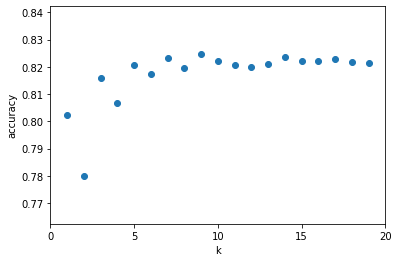

In [48]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

### RFE Feature Engineering

In [49]:
### RFE

number_of_features_list=np.arange(1,29)
high_score=0

#Variable to store the optimum features
number_of_features=29          
score_list =[]

for n in range(len(number_of_features_list)):
    model = LogisticRegression()
    rfe = RFE(model,number_of_features_list[n])
    X_train_rfe = rfe.fit_transform(X_train_scaled,y_train)
    X_test_rfe = rfe.transform(X_test_scaled)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        number_of_features = number_of_features_list[n]

print("Optimum number of features: %d" %number_of_features)
print("Score with %d features: %f" % (number_of_features, high_score))

Optimum number of features: 9
Score with 9 features: 0.776710


In [50]:
cols = list(X_train_scaled.columns)
model = LogisticRegression()

#Initializing RFE model
rfe = RFE(model, 10)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['yardsToGo', 'numberOfPassRushers', 'epa', 'RB', 'EMPTY', 'I_FORM',
       'PISTOL', 'SHOTGUN', 'SINGLEBACK'],
      dtype='object')


### Select K Best

In [41]:
f_selector = SelectKBest(f_regression, k=10)

f_selector.fit(X_train_scaled, y_train)

f_support = f_selector.get_support()
f_feature = X_train.loc[:,f_support].columns.tolist()

print(str(len(f_feature)), 'selected features')
print(f_feature)

10 selected features
['yardsToGo', 'numberOfPassRushers', 'epa', 'RB', 'EMPTY', 'I_FORM', 'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'defense_rating']


# wangle-functions

In [ ]:
#plays["offenseFormation"].replace({"I_FORM": "IFORM"}, inplace=True)

#plays = plays[plays['offenseFormation'].notna()]

#plays = plays[plays['typeDropback'].notna()]

#plays.personnelD.isna().sum()



#ohe = OneHotEncoder(sparse=False)

#ohe.fit_transform(plays[['personnelO']]).shape

#plays['possessionTeam'].replace({'TRADITIONAL':0,'SCRAMBLE_ROLLOUT_RIGHT':1,
#                                 'SCRAMBLE':2,'DESIGNED_ROLLOUT_RIGHT':3,
#                                 'SCRAMBLE_ROLLOUT_LEFT':4,'DESIGNED_ROLLOUT_LEFT':5,
#                                 'UNKNOWN':6}, inplace=True)

#plays['offenseFormation'].replace({'SHOTGUN':0,'SINGLEBACK':1,'EMPTY':2,'I_FORM':3,
#                                   'PISTOL':4,'JUMBO':5,'WILDCAT':6}, inplace=True)

#plays['possessionTeam'].replace({'PIT':0,'GB':1,'TB':2,'IND':3,'ATL':4,'PHI':5,'NYG':6,'DET':7,
#                                'CLE':8,'MIN':9,'LA':10,'OAK':11,'NE':12,'BAL':13,'CAR':14,
#                                'DAL':15,'CIN':16,'DEN':17,'JAX':18,'KC':19,'HOU':20,'WAS':21,
#                                'SF':22,'NYJ':23,'ARI':24,'NO':25,'BUF':26,'CHI':27,'MIA':28,
#                                'LAC':29,'TEN':30,'SEA':31}, inplace=True)

### sklearn pipeline column transformer w/ one hot encoding

In [ ]:
#print('Decision Tree with 7 features')
#print('Accuracy:',cross_val_score(estimator = clf, pipe_dt, X_train, y_train, cv=5, n_jobs=4,scoring='accuracy').mean())
#print('Precision:',cross_val_score(pipe_nb, X_train, y_train, cv=5, scoring='precision').mean())
#print('Recall:',cross_val_score(pipe_nb, X_train, y_train, cv=5, scoring='recall').mean())

In [ ]:
#models = [GaussianNB(), DecisionTreeClassifier(), SVC(), LogisticRegression(solver='lbfgs')]
#names = ["Naive Bayes", "Decision Tree", "SVM","Logistic Regression"]
#for model, name in zip(models, names):
#    print(name)
#    for score in ["accuracy", "precision", "recall"]:
#        print(score)
#        print (cross_val_score(pipe, X_train, y_train, cv=5, scoring=score).mean())

In [ ]:
#y_pred = logit.predict(pipe, X_train)

In [ ]:
def prep_plays_data():
    '''
    This function retrieves calls the function that acquires 
    the plays csv and prepares it for an mvp
    '''
    # acquire the plays csv and save it as a dataframe
    df = plays
    # keep only the useful columns for mvp
    df = df[['playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
             'offenseFormation', 'personnelO', 'defendersInTheBox', 'numberOfPassRushers', 
             'personnelD', 'typeDropback', 'gameClock', 'absoluteYardlineNumber', 'epa',
             'playType', 'passResult', 'playResult']]
    # filter out any data that is not a pass play
    df = df[df.playType == 'play_type_pass']
    # creates 0 or 1 for tradtional and scramble
    df['typeDropback'].replace({'TRADITIONAL':0,'SCRAMBLE_ROLLOUT_RIGHT':1,
                                 'SCRAMBLE':1,'DESIGNED_ROLLOUT_RIGHT':0,
                                 'SCRAMBLE_ROLLOUT_LEFT':1,'DESIGNED_ROLLOUT_LEFT':0,
                                 'UNKNOWN':0}, inplace=True)
    # ranking the teams with the most cumulative passing yards
    df['possessionTeam'].replace({'TB': 1, 'PIT': 2, 'KC': 4, 'ATL': 3, 'LA': 5, 'GB': 7, 'PHI': 8,
                                  'NE': 9, 'NYG': 10, 'CLE': 11, 'IND': 6, 'HOU': 12, 'SF': 17, 'OAK': 16,
                                  'CAR': 15, 'MIN': 14, 'NO': 13, 'LAC': 19, 'DAL': 18, 'DET': 20, 'CHI': 22,
                                  'CIN': 24, 'DEN': 23, 'BAL': 21, 'JAX': 25, 'NYJ': 26, 'MIA': 28, 'WAS': 27,
                                  'TEN': 29, 'BUF': 31, 'ARI': 32, 'SEA': 30}, inplace=True)  
    
    # cleaning up the pass result column to only pass complete and pass incomplete
    #df = df[df["passResult"].isin(["C", "IN"])]
    #df['passResult'].replace({'C': 0, 'IN' : 1}, inplace=True)
    # create a new column that extracts 
    # "(number) RB, (number) TE, (number) WR"
    # and saves it as a temporary column
    df['tempO'] = df.personnelO.str.extract(r'(\d RB, \d TE, \d WR)')
    # create a new column that extracts 
    # "(number) DL, (number) LB, (number) DB"
    # and saves it as a temporary column
    df['tempD'] = df.personnelD.str.extract(r'(\d DL, \d LB, \d DB)')
    # keeps the rows that contain only the string in tempO column
    df = df[df.personnelO == df.tempO]
    # keep the rows that contain only the string in tempD column
    df = df[df.personnelD == df.tempD]
    # create a temporary dataframe containing the personnelO 
    # column split by a comma and space
    temp = df.personnelO.str.split(', ', expand = True)
    # create a new column with the number of RB on the field
    df['RB'] = temp[0].str.replace(r' RB', '')
    # create a new column with the number of TE on the field
    df['TE'] = temp[1].str.replace(r' TE', '')
    # create a new column with the number of WR on the field
    df['WR'] = temp[2].str.replace(r' WR', '')
    # create a temporary dataframe containing the personnelD 
    # column split by a comma and space
    temp = df.tempD.str.split(', ', expand = True)
    # create a new column with the number of DL on the field
    df['DL'] = temp[0].str.replace(r' DL', '')
    # create a new column with the number of LB on the field
    df['LB'] = temp[1].str.replace(r' LB', '')
    # create a new column with the number of DB on the field
    df['DB'] = temp[2].str.replace(r' DB', '')
    # create dummies for offensive formation
    formation = pd.get_dummies(df.offenseFormation)
    # Classifying traditional and rollouts into normal dropbacks
    df.typeDropback = df.typeDropback.apply(lambda value : str(value).replace('DESIGNED_ROLLOUT_RIGHT', 'normal'))
    df.typeDropback = df.typeDropback.apply(lambda value : str(value).replace('TRADITIONAL', 'normal'))
    df.typeDropback = df.typeDropback.apply(lambda value : str(value).replace('DESIGNED_ROLLOUT_LEFT', 'normal'))
    # Classifying all scrambles as scrambles
    df.typeDropback = df.typeDropback.apply(lambda value : str(value).replace('SCRAMBLE_ROLLOUT_RIGHT', 'scramble'))
    df.typeDropback = df.typeDropback.apply(lambda value : str(value).replace('SCRAMBLE', 'scramble'))
    df.typeDropback = df.typeDropback.apply(lambda value : str(value).replace('SCRAMBLE_ROLLOUT_LEFT', 'scramble'))
    df.typeDropback = df.typeDropback.apply(lambda value : str(value).replace('scramble_ROLLOUT_LEFT', 'scramble'))   
    df = df.rename(columns = {'typeDropback' : 'QB_under_pressure', 'passResult' : 'pass_stopped', 'possessionTeam': 'team_by_comp_yds'})
    # join all dataframes together
    df = pd.concat([df, formation], axis = 1)
    # drop temporary columns and duplicates
    df = df.drop(columns = {'personnelO', 'personnelD', 'tempO', 'tempD', 'playType', 'offenseFormation'})
    # reorder the index and drop the old index
    # Changing datatype from object to int
    df = df.astype({'DL':'int', 'LB':'int','DB':'int'})
    # creating formation columns
    df['four_three'] = np.where((df['DL'] == 4) & (df['LB'] == 3),1,0)
    df['three_four'] = np.where((df['DL'] == 3) & (df['LB'] == 4),1,0)
    df['nickel'] = np.where(df['DB'] == 5, 1, 0)
    df['dime'] = np.where(df['DB'] == 6, 1, 0)
    df = df.reset_index(drop=True)
    df = df.dropna()
    return df

print("Prep.py Loaded Successfully")

In [ ]:
df = prep_plays_data()
df

In [ ]:
df['pass_stopped'] = df[df["pass_stopped"].isin(["C", "IN"])]
df['pass_stopped'].replace({'C': 0, 'IN' : 1}, inplace=True)
df